# Heavy Traffic Indicators on I-94

In this project, we're going to analyze a [dataset](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume) about the westbound traffic on the I-94 Interstate highway.

The goal of this analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be type of weather, time of the day etc.,

## The I-94 Traffic dataset

In [2]:
import pandas as pd
df = pd.read_csv('i94.csv')

In [3]:
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [4]:
df.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


The dataset has 48,204 rows and 9 columns, and there are no null values. Each row describes traffic and weather data for a specific hour — we have data from 2012-10-02 09:00:00 until 2018-09-30 23:00:00.

For the recording station for this dataset, the direction of the route is westbound (i.e., cars moving from east to west). This means that the results of our analysis will be about the westbound traffic in the proximity of the station. So we avoid generalizing the results for the entire I-94 highway.

## Analysing Traffic Volume

Examining the distribution of the `traffic_volume` column:

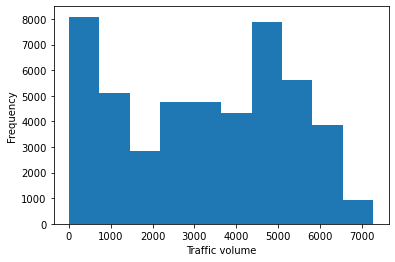

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
df['traffic_volume'].plot.hist()
plt.xlabel('Traffic volume')
plt.show()

In [7]:
df['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Between 2012-10-02 09:00:00 and 2018-09-30 23:00:00, the hourly traffic volume varied from 0 to 7,280 cars, with an average of 3,260 cars.

About 25% of the time, there were only 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction. However, about 25% of the time, the traffic volume was four times as much (4,933 cars or more).

With this observation we will proceed our analysis comparing daytime data with nighttime data.

## Traffic volume: Day vs Night
### Isolating the data for day and night

We will divide our data as follows:

- Daytime data: 7AM to 7PM (12 hours)
- Nighttime data: 7PM to 7AM (12 hours)

In [8]:
df['date_time'] = pd.to_datetime(df['date_time'])

import datetime as dt
day = df[(df['date_time'].dt.hour >= 7) & (df['date_time'].dt.hour < 19)]
print(day.shape)
night = df[(df['date_time'].dt.hour >= 19) | (df['date_time'].dt.hour < 7)]
print(night.shape)


(23877, 9)
(24327, 9)


### Analysing day and night traffic volume

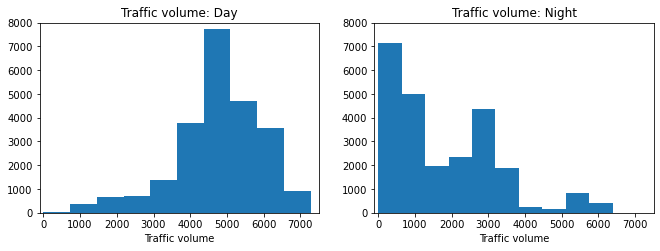

In [9]:
plt.figure(figsize = (11, 3.5))

plt.subplot(1, 2, 1)
plt.hist(day['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.xlabel('Traffic volume')
plt.title('Traffic volume: Day')

plt.subplot(1, 2, 2)
plt.hist(night['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.xlabel('Traffic volume')
plt.title('Traffic volume: Night')
plt.show()

In [10]:
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [12]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The histogram for the day time traffic volume is left skewed. This means that most of the traffic volume values are high — there are 4,252 or more cars passing the station each hour 75% of the time (because 25% of values are less than 4,252).

The histogram for the nighttime data is right skewed. This means that most of the traffic volume values are low — 75% of the time, the number of cars that passed the station each hour was less than 2,819.

Except for a few outliers, the traffic at night is generally light. Since our goal is to find indicators of heavy traffic, so we'll proceed with only the daytime data moving forward.